***
**Tutorial 3 for Chapter 2**

Case study 6: Real Estate Ownership Classification by Logistic Regression
***
<font color = 'darkred'>*Reference:*
<font color = 'darkred'>*Python数据挖掘实战*

<!-- Acknowledgement:  
**i2DM (Tan, Steinbach, Kumar (2018) Introduction to Data Mining , 2nd Ed, Pearson )** Pearson Press   -->
For the tutorial course of AMA546 Statistical Data Mining   
Lecturer: Mr. Qiuyi Huang
PolyU, HKSAR

***Contents***
- Objectives of the analysis
- Description of the data
- Exploratory data analysis
  - Data quality (No need in our case)
    - Data Cleaning
    - Data Validation
    - Data Transformation
  - Marginal variable analysis
    - Home Ownership
    - Scatter plot matrix
    - Violin plot of Age, Num Bathrooms, Num Bedrooms, Num Cars and Num Children
    - Exploring the Relationships using 3D Scatter Plot
  - Data preprocessing
    - Split the training and testing set
- Model building
- Model evaluation (based on testing data)
  - Accuracy
  - Confusion matrices
- Summary report
  - Context
  - Objectives
  - Organisation of the data
  - Exploratory data analysis
  - Model specification
  - Model evaluation

In [1]:
import pandas
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib. pyplot as plt 

# Objectives of the analysis
In this case study, we will use **logistic regression** to predict the **ownership of the real estate**.

The initiator of this case study was the government department of a city in China, who wants to know the ownership state of the real estate in the city. However, the cost of household census is extremely high. So the government wants to predict the ownership state of the real estate through the data related to the real estate.

The government has found that whether a real estate is owned by the occupant is related to the personal **circumstances of the household** and the **condition of the house**. This allows us to predict whether a real estate is owned by the occupant using housing data collected from the estate management office and the cable TV company.

# Description of the data 

In [2]:
### Load data
owner = pandas.read_csv('data/Ownership.csv')
owner.head()

Age    Education Level Gender     Internet Connection Marital Status  \
0   33          Doctorate   Male                 Dial-Up        Married   
1   47          Doctorate   Male                     DSL        Married   
2   35  Bachelor's Degree   Male             Cable Modem        Married   
3   32  Bachelor's Degree   Male             Cable Modem        Married   
4   32  Bachelor's Degree   Male  No Internet Connection        Married   

   Movie Selector  Num Bathrooms  Num Bedrooms  Num Cars  Num Children  ...  \
0  Spouse/Partner            2.5             3         1             0  ...   
1  Spouse/Partner            2.0             2         2             1  ...   
2              Me            2.5             4         2             2  ...   
3              Me            3.5             5         2             2  ...   
4              Me            2.5             4         2             0  ...   

   PPV Freq Prerec Buying Freq Prerec Format Prerec Renting Freq  \
0    Rarely            Monthly           DVD              Rarely   
1     Never            Monthly           DVD             Monthly   
2    Rarely             Rarely           DVD             Monthly   
3     Never             Rarely           DVD             Monthly   
4    Rarely             Rarely           DVD              Weekly   

  Prerec Viewing Freq CustomerID  Theater Freq TV Movie Freq  \
0             Monthly     877687       Monthly       Monthly   
1              Weekly     877723        Rarely        Weekly   
2             Monthly     877792        Rarely         Daily   
3             Monthly     877840       Monthly        Weekly   
4              Weekly     877988        Weekly        Weekly   

           TV Signal Home Ownership  
0              Cable            Own  
1              Cable            Own  
2              Cable            Own  
3              Cable            Own  
4  Digital Satellite            Own  

[5 rows x 21 columns]

The dataset contain 7 columns of numerical data and 14 column of categorical data. The column `Home Ownership` is the response variable we want to predict. There are 3085 rows (samples) in the dataset. The explanations and range of the features are attached below:

Variable | Explanation | Range
---|---|---
Age | Age of the house owner | [20, 62]
Education Level | Education level of the house owner | {Doctorate, Bachelor's Degree, Master's Degree, Associate's Degree, Some College, Post-Doc, Trade School, High School, Grade School}
Gender | Gender of the house owner | {Male, Female}
Home Ownership | House ownership | {Own, Rent}
Internet Connection | Internet connection type of the house owner | {Dial-Up, DSL, Cable Modem, No Internet Connection, Other, IDSN}
Marital Status | Marital status of the house owner | {Married, Divorced, Never Married, Separated, Other}
Movie Selector | The type of the movie selector | {Spouse/Partner, Me, Other, Children}
Num Bathrooms | Number of bathrooms in the house owner's home | [0.5, 5]
Num Bedrooms | Number of bedrooms in the house owner's home | [1, 10]
Num Cars | Number of cars owned by the house owner | [1, 6]
Num Children | Number of children of the house owner | [0, 6]
Num TVs | Number of televisions in the house owner's home | [0, 10]
PPV Freq | Frequency of Pay-Per-View of the house owner | {Rarely, Never, Monthly, Weekly, Daily}
Prerec Buying Freq | Frequency of pre-recorded movie buying | {Monthly, Rarely, Never, Weekly, Daily}
Prerec Format | Pre-recorded movie format | {DVD, VHS, Betamax, Laserdisk, Video CD, Other}
Prerec Renting Freq | Frequency of pre-recorded movie renting | {Rarely, Monthly, Weekly, Never, Daily}
Prerec Viewing Freq | Frequency of pre-recorded movie viewing | {Monthly, Weekly, Rarely, Daily, Never}
CustomerID | House owner identifier | [877687, 927818]
Theater Freq | Frequency of theater movie watching | {Monthly, Rarely, Weekly, Never, Daily}
TV Movie Freq | Frequency of TV movie watching | {Monthly, Weekly, Daily, Rarely, Never}
TV Signal | Type of TV signal | {Cable, Digital Satellite, Analog antennae, Don't watch TV, Analog Satellite}

#  Exploratory data analysis

## Data quality (No need in our case)
### Data Cleaning
We'll check for any missing values (**NA or Null**) in our dataset using the `isna()` method in Python. Fortunately, no such values were found, and data cleaning is not necessary in this regard. Note that .isnull() is equivalent to .isna(), so we can use either method to check for missing values.

In [3]:
### There is no NA or Null data in the dataframe
print(owner[owner.isna().any(axis=1)])

Empty DataFrame
Columns: [Age, Education Level, Gender, Internet Connection, Marital Status, Movie Selector, Num Bathrooms, Num Bedrooms, Num Cars, Num Children, Num TVs, PPV Freq, Prerec Buying Freq, Prerec Format, Prerec Renting Freq, Prerec Viewing Freq, CustomerID, Theater Freq, TV Movie Freq, TV Signal, Home Ownership]
Index: []

[0 rows x 21 columns]


### Data Validation
Through the analysis of continuous variables and categorical variables, their values are within the reasonable range. All of the data appears to be reasonable and **no inconsistencies** are immediately noticeable.

In [4]:
### Descriptive statistics for continous variables
owner.describe()

Age  Num Bathrooms  Num Bedrooms     Num Cars  Num Children  \
count  3085.000000    3085.000000   3085.000000  3085.000000   3085.000000   
mean     33.156240       2.096759      2.878444     1.682658      0.806483   
std       7.239346       0.812988      1.150117     0.802138      1.111995   
min      20.000000       0.500000      1.000000     0.000000      0.000000   
25%      28.000000       1.500000      2.000000     1.000000      0.000000   
50%      32.000000       2.000000      3.000000     2.000000      0.000000   
75%      38.000000       2.500000      4.000000     2.000000      2.000000   
max      62.000000       5.000000     10.000000     6.000000      6.000000   

           Num TVs     CustomerID  
count  3085.000000    3085.000000  
mean      2.098865  897854.733225  
std       1.230140   12692.682200  
min       0.000000  877687.000000  
25%       1.000000  888787.000000  
50%       2.000000  891654.000000  
75%       3.000000  912515.000000  
max      10.000000  927818.000000

In [5]:
### Possiable values for discrete variables
# set display option
pandas.set_option('max_colwidth', None)
# categorical features
oneHotColumns = [
    'Gender', 'Internet Connection', 'Marital Status',
    'Movie Selector', 'Prerec Format', 'TV Signal', 
    'Education Level', 'PPV Freq', 'Theater Freq', 
    'TV Movie Freq', 'Prerec Buying Freq', 
    'Prerec Renting Freq', 'Prerec Viewing Freq'
]

# store the categorical feature
unique_values = {}
for column in oneHotColumns:
    unique_values[column] = owner[column].unique()
result_df = pandas.DataFrame(list(unique_values.items()), columns=["Column", "Unique Values"])
result_df

Column  \
0                Gender   
1   Internet Connection   
2        Marital Status   
3        Movie Selector   
4         Prerec Format   
5             TV Signal   
6       Education Level   
7              PPV Freq   
8          Theater Freq   
9         TV Movie Freq   
10   Prerec Buying Freq   
11  Prerec Renting Freq   
12  Prerec Viewing Freq   

                                                                                                                           Unique Values  
0                                                                                                                         [Male, Female]  
1                                                                       [Dial-Up, DSL, Cable Modem, No Internet Connection, Other, IDSN]  
2                                                                                   [Married, Divorced, Never Married, Separated, Other]  
3                                                                                                  [Spouse/Partner, Me, Other, Children]  
4                                                                                        [DVD, VHS, Betamax, Laserdisk, Video CD, Other]  
5                                                          [Cable, Digital Satellite, Analog antennae, Don't watch TV, Analog Satellite]  
6   [Doctorate, Bachelor's Degree, Master's Degree, Associate's Degree, Some College, Post-Doc, Trade School, High School, Grade School]  
7                                                                                                [Rarely, Never, Monthly, Weekly, Daily]  
8                                                                                                [Monthly, Rarely, Weekly, Never, Daily]  
9                                                                                                [Monthly, Weekly, Daily, Rarely, Never]  
10                                                                                               [Monthly, Rarely, Never, Weekly, Daily]  
11                                                                                               [Rarely, Monthly, Weekly, Never, Daily]  
12                                                                                               [Monthly, Weekly, Rarely, Daily, Never]

### Data Transformation



Since there are many **string variables** in the dataset, we need to transform them for later processing. 

 - One transformation method is the **label encoding**. It is a **direct numeric representation of a string variable**. The values for the different values of the variable will be determined in the order in which they appear in the dataset. **We will use this coding method for our exploratory data analysis**.
<img src='https://miro.medium.com/v2/resize:fit:1400/format:webp/1*ZFCX83XaMNzOAXRxAcvMJw.png' width=600>

 - Another way to convert is the **one-hot encoding** we discussed in the early tutorial. We first **separate** the string variables from the numeric variable,  and then **train** the one-hot encoder with the string variable to get the transformation rules and **encode** them. We then **combine** the encoded data with the numeric variable to create our explanatory dataframe. The response variable  remains in string format, as this does not affect our analysis. **We will use this encoding for logistic regression**.

In [6]:
### One-hot encoding
# categorical features
oneHotColumns = [
    'Gender', 'Internet Connection', 'Marital Status',
    'Movie Selector', 'Prerec Format', 'TV Signal', 
    'Education Level', 'PPV Freq', 'Theater Freq', 
    'TV Movie Freq', 'Prerec Buying Freq', 
    'Prerec Renting Freq', 'Prerec Viewing Freq'
]
# numerical features
numericColumns = [
    'Age', 'Num Bathrooms', 
    'Num Bedrooms', 'Num Cars', 
    'Num Children', 'Num TVs'
]

# import OneHotEncoder module
from sklearn.preprocessing import OneHotEncoder
# build a OneHotEncoder object
oneHotEncoder = OneHotEncoder()
# called on the encoder object to learn the encoding rules
oneHotEncoder.fit(owner[oneHotColumns])
# produce a one-hot encoded representation of the categorical features
oneHotData = oneHotEncoder.transform(owner[oneHotColumns])

from scipy.sparse import hstack
# horizontally stack the one-hot encoded data with the numerical data
x = hstack([
    oneHotData, 
    owner[numericColumns].astype(float).values
])
# response variable
y = owner['Home Ownership']

In [7]:
### Label encoder
# import label encoder
from sklearn import preprocessing 
# make an instance of Label Encoder
label_encoder = preprocessing.LabelEncoder()
# make a copy of the original dataframe
owner_ecd = owner.copy()
# perform label encoding
for i in oneHotColumns:
    owner_ecd[i] = label_encoder.fit_transform(owner[i])
# preview
owner_ecd.head()

Age  Education Level  Gender  Internet Connection  Marital Status  \
0   33                2       1                    2               1   
1   47                2       1                    1               1   
2   35                1       1                    0               1   
3   32                1       1                    0               1   
4   32                1       1                    4               1   

   Movie Selector  Num Bathrooms  Num Bedrooms  Num Cars  Num Children  ...  \
0               3            2.5             3         1             0  ...   
1               3            2.0             2         2             1  ...   
2               1            2.5             4         2             2  ...   
3               1            3.5             5         2             2  ...   
4               1            2.5             4         2             0  ...   

   PPV Freq  Prerec Buying Freq  Prerec Format  Prerec Renting Freq  \
0         3                   1              1                    3   
1         2                   1              1                    1   
2         3                   3              1                    1   
3         2                   3              1                    1   
4         3                   3              1                    4   

   Prerec Viewing Freq  CustomerID  Theater Freq  TV Movie Freq  TV Signal  \
0                    1      877687             1              1          2   
1                    4      877723             3              4          2   
2                    1      877792             3              0          2   
3                    1      877840             1              4          2   
4                    4      877988             4              4          3   

   Home Ownership  
0             Own  
1             Own  
2             Own  
3             Own  
4             Own  

[5 rows x 21 columns]

As you can see, the columns except for the response variable are encoded by 0, 1, 2, ... ...

## Marginal variable analysis

### Home Ownership
We begin with an analysis of the possible **`Home Ownership`**. In the data set we obtained, there are a total of two possible `Home Ownership`, which is `Own` and `Rent`. Among them, 64.7% of the observations own houses, and the remaining 35.3% of the observations rent houses. This suggests that **our observed data is somewhat imbalanced**, and we need to be careful when building our model and constructing the confusion matrix.

In [8]:
### Use crosstab to get the proportion of label
renewal_counts = pandas.crosstab(index=owner["Home Ownership"],
                                 columns="Proportion",
                                 normalize='all') *100
round(renewal_counts,1).astype(str).apply(lambda x:x + '%')

col_0          Proportion
Home Ownership           
Own                 64.7%
Rent                35.3%

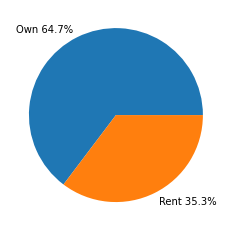

In [9]:
### In pie plot
plt.pie(renewal_counts['Proportion'], labels = ['Own 64.7%', 'Rent 35.3%']); plt.show()

***
The same as the former case study, we will **analyze all the explanatory variables together**, and **select a few variables of interest to explore in more detail**. The goal is to classify the home ownership, so we need to **pay more attention to the relationship between each explanatory variable and the `Home Ownership`**.
***

### Scatter plot matrix
In a scatter plot, the **scatter points overlap** when both the X-axis and Y-axis are categorical variables. In this case, the scatter plot loses its meaning. Here, we **only focus on the distribution plots on the diagonal**.

In a scatter plot below:
 - For feature `Age`, **homeowners are significantly older** than renters.   
 - For feature `martial status`, those with **value 1 (married) have a higher proportion of home ownership** and those with value 2 (unmarried) have a higher proportion of renting.   
 - For feature `Num Bathroom`, `Num Bedroom`, `Num Cars`, and `Num Children`, **homeowners with larger values (larger numbers)** have a higher proportion of home ownership. These phenomenon are also consistent with the common sense.

<Figure size 57600x57600 with 0 Axes>

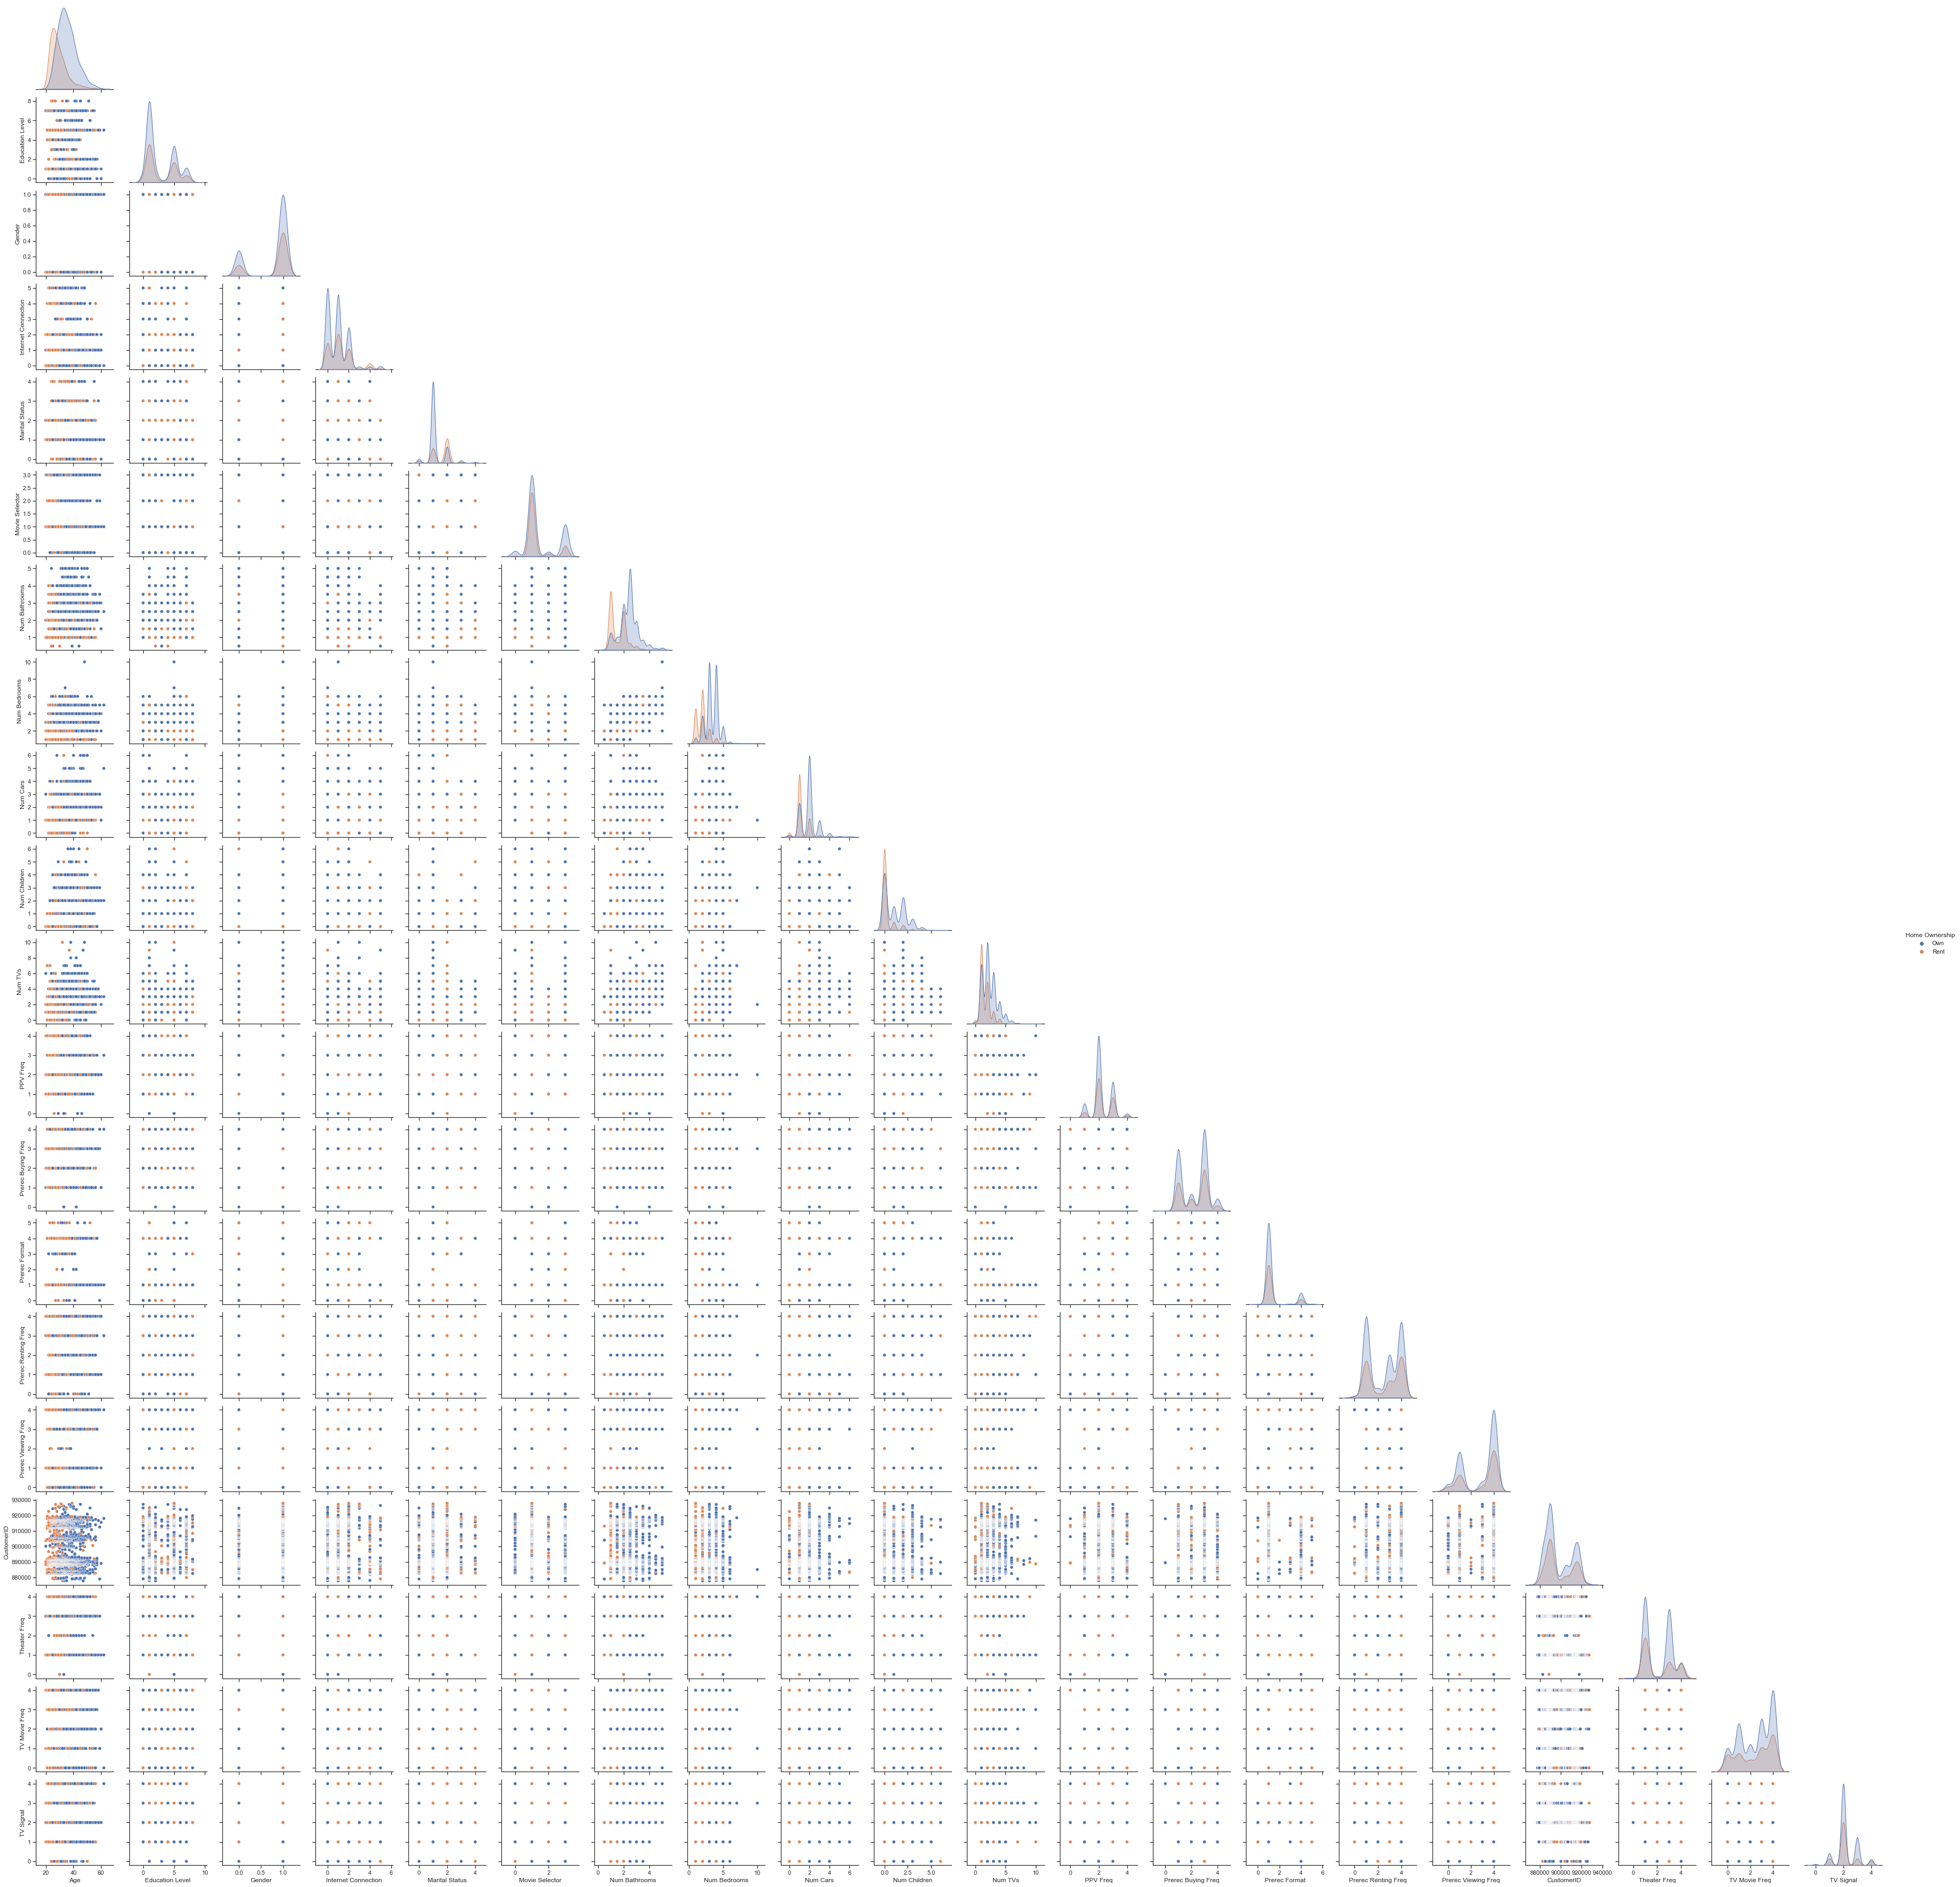

In [10]:
# Scatter plot matrices of explanatory variables
# it takes about 55 secounds to run
sns.set_theme(style="ticks")
plt.figure(figsize=(32, 32), dpi=1800)
sns.pairplot(owner_ecd, hue="Home Ownership", corner=True)

### Violin plot of Age, Num Bathrooms, Num Bedrooms, Num Cars and Num Children

For the five variables have significant discriminative effects in the above analysis, we draw violin plots to explore their classification effects. 

The **violin plot** is a popular visualization tool used to display the **distribution** of a dataset.   It is **a combination of a box plot and a kernel density plot**, which resembles a violin.

In a violin plot, the **distribution** of the data is **displayed as a kernel density estimate**, with the width of the plot at each point reflecting the density of the data at that point. The **plot also includes a box plot**, which provides information about the quartiles, median, and outliers of the data. The box plot itself is often drawn as a thin line within the thicker violin plot. The resulting plot provides a useful and informative summary of the distribution of the data. 

***Graph A is the boxplot, Graph B is the violin plot:***

<img src='https://www.mdpi.com/mps/mps-03-00064/article_deploy/html/images/mps-03-00064-g001-550.jpg' width=500>

**Age:**  
As can be seen in the figure, the distribution of Rent is concentrated between **20 and 30 years old**, while the distribution of Own is concentrated between **27 and 40 years old**. The distributions of different classes is different, but there is also **some overlap**.

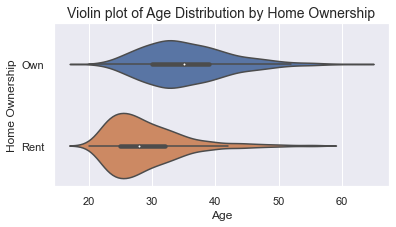

In [11]:
# Set the style
sns.set(style="ticks")
sns.set_style("darkgrid")
# plot the violinplot
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
sns.violinplot(y="Home Ownership", x="Age", data=owner, ax=ax, orient="h")
ax.set_title("Violin plot of Age Distribution by Home Ownership", fontsize=14)
plt.show()

**Num Bathrooms:**  
`Rent` usually only has 1-2 bathrooms, while `Own` usually has 2-4 bathrooms. The distinguishing effect of Bathrooms is relatively obvious, and we will also further observe this variable in the following analysis.

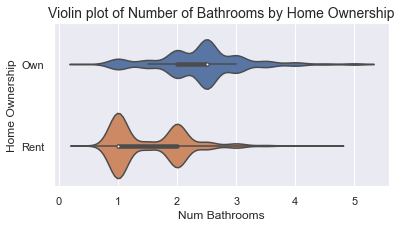

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
sns.violinplot(y="Home Ownership", x="Num Bathrooms", data=owner, ax=ax, orient="h")
ax.set_title("Violin plot of Number of Bathrooms by Home Ownership", fontsize=14)
plt.show()

**Num Bedrooms:**  
`Rent` usually has 1-3 bedrooms, and `Own` has 2-4 bathrooms. The distinguishing effect of the `Num Bedrooms` is not as obvious as the `Num Bathrooms`. Notice that `Own` has some outliers on the `Num Bedrooms`.

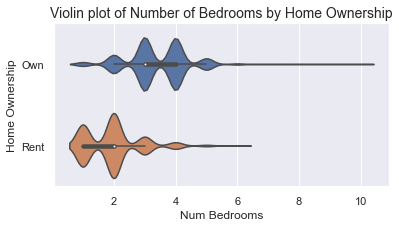

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
sns.violinplot(y="Home Ownership", x="Num Bedrooms", data=owner, ax=ax, orient="h")
ax.set_title("Violin plot of Number of Bedrooms by Home Ownership", fontsize=14)
plt.show()

**Num Cars:**  
As for the number of cars owned, `Rent` range between 0-2 cars, while `Own` will typically have 1-3 cars and is unlikely to have no cars. Both `Rent` and `Own` both have some outliers.

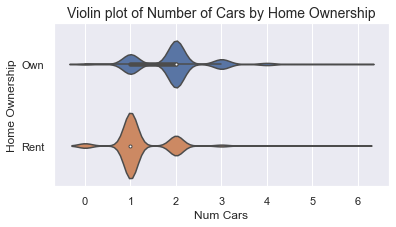

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
sns.violinplot(y="Home Ownership", x="Num Cars", data=owner, ax=ax, orient="h")
ax.set_title("Violin plot of Number of Cars by Home Ownership", fontsize=14)
plt.show()

**Num Children:**  
Most `Rent` has no children, and only a few have 1-2 children. While `Own` usually has 0-3 children.

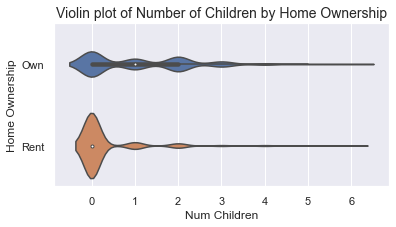

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
sns.violinplot(y="Home Ownership", x="Num Children", data=owner, ax=ax, orient="h")
ax.set_title("Violin plot of Number of Children by Home Ownership", fontsize=14)
plt.show()

### Exploring the Relationships using 3D Scatter Plot
The following plot is **interactive**, allowing you to explore the internal structure of the 3D scatter plot by zooming or rotating it with your mouse. We created this plot to investigate the classification effects of the variables `Num Bathrooms`, `Num Children`, and `Num Bedrooms` as an example. By plotting these three dimensions in a 3D scatter plot, we aim to gain insight into the relationship between these variables and potentially identify any patterns or trends that may exist. *You may explore the relationship of other variable pairs.*

In [16]:
import plotly.express as px
fig = px.scatter_3d(owner, x='Num Bathrooms', y='Num Children', z='Num Bedrooms',
              color='Home Ownership')
fig.show()

It can be seen that although there is a certain degree of differentiation between `Rent` and `Own` in space, the overlap between the clusters is serious. This suggests that `Rent` and `Own` are **difficult to distinguish in low-dimensional space using only a few variables**.

**Conclusion:**
    
 - In the **Data quality** section, we mainly encoded the original dataset. 
     - We first use the **Label encoder** to transform string variables into numerical variables to facilitate our exploratory data analysis. 
     - After that we use **One-hot encoder** to encode the string variable into one-hot form, which is convenient for us to perform logistic regression.
 - In **Marginal variable analysis**:
     - for the response variable Home Ownership, we find that there are more samples labeled `Own` than `Rent`，
     - for the explanatory variables, we find that `Age`, `Num Bathroom`, `Num Bedroom`, `Num Cars`, and `Num Children` have a good discriminative effect on Home Ownership. We further analyzed the discriminative effect of these variables with **violinplot**. Finally, we used **3D Scatter Plot** to analyze the classification effect of the combination of different variables. We find that **a few variables do not distinguish `Home Ownership` well**.


## Data preprocessing
For the dataset after one-hot encoding, we only need to split the training set and the test set.

### Split the training and testing set

In [17]:
# Split the dataset into training set (70%) and testing set (30%), the random_state is used to control randomness
from sklearn.model_selection import train_test_split # Import the training and testing dataset splitter
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# Model building 
In the following, we will use **logistic regression** to classify the `Home Ownership`.

**Logistic Regression** is a statistical method for analyzing a dataset in which there are **one or more explanatory variables** that determine an outcome. It is used for **binary classification problems** where the dependent variable only has two possible outcomes, such as yes or no, pass or fail, true or false, etc. 

**Basic idea:** Use a logistic function to **model the probability** of the dependent variable being a certain class. Mathematically, the logistic function can be represented as:

$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/640px-Logistic-curve.svg.png' width=300>

where $z = \beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + ... + \beta_nx_{in}$, $x_i$ is the vector of independent variables for the $i^{th}$ observation and $\beta_0, \beta_1, ..., \beta_n$ are the coefficients. 

**Coefficients estimation:** The coefficients are estimated through the **maximum likelihood estimation (MLE) method**.  
The MLE method is based on the assumption that the observed data follows a certain probability distribution. In logistic regression, the response variable is binary and **follows a Bernoulli distribution**. The **conditional probability of the response variable** given the predictor variables $x_i$ and the coefficients $\beta$ can be represented as:

$$ p(y_i | x_i, \beta) = \sigma(\beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + ... + \beta_nx_{in})^{y_i} (1 - \sigma(\beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + ... + \beta_nx_{in}))^{1-y_i} $$

where $y_i$ is the response variable for the $i^{th}$ observation and $\sigma(z) = \frac{1}{1 + e^{-z}}$ is the logistic function. $\sigma(\beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + ... + \beta_nx_{in})$ is the logistic function, can be interpreted as the probability of $y_i$ being class 1: $P(y_i=1| x_i, \beta)$.   
 - $(\sigma(\beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + ... + \beta_nx_{in}))^{y_i}$ is equal to 1 if $y_i$ is class 1, and 0 otherwise.   
 - $(1 - \sigma(\beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + ... + \beta_nx_{in}))^{1-y_i}$ is equal to 1 if $y_i$ is class 0, and 0 otherwise.

The **likelihood function** is the product of the conditional probabilities of all observations:

$$ L(\beta) = \prod_{i=1}^{N} p(y_i | x_i, \beta) $$

where $N$ is the number of observations.

The **log-likelihood function** is the logarithm of the likelihood function:

$$ l(\beta) = \ln L(\beta) = \sum_{i=1}^{N} \left[ y_i \ln(\sigma(\beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + ... + \beta_nx_{in})) + (1 - y_i)\ln(1 - \sigma(\beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + ... + \beta_nx_{in}))\right] $$

The coefficients are estimated by finding the values of $\beta_0, \beta_1, ..., \beta_n$ that maximize the log-likelihood function using gradient descent.

**Prediction:** Once the coefficients are estimated, the prediction of the dependent variable can be made using the following equation:

$$ \hat{y} = \begin{cases} 1 & \text{if } \sigma(z) \geq \tau \\ 0 & \text{if } \sigma(z) < \tau \end{cases} $$

The **logistic regression model provides a probability score for each observation**, indicating the **likelihood of it belonging to a certain class**. This score can then be transformed into a binary outcome using a threshold value $\tau$, usually $\tau=0.5$. 

In conclusion, logistic regression is a powerful and widely used machine learning technique for binary classification problems. It is simple to implement, can handle a large number of independent variables, and provides probabilities for each observation, making it easy to interpret and understand the results.

In the following analysis, we will build a logistic regression model directly on the training set.

In [18]:
from sklearn.linear_model import LogisticRegression  # import the LogisticRegression module
from sklearn.model_selection import cross_val_score  # import the cross validation module
# build a logistic regression object
lrModel = LogisticRegression(solver='newton-cg')
# perform the cross validation 
lrModel.fit(x_train, y_train)
# get the Accuracy of the ogistic regression on training data
lrModel.score(x_train, y_train)

0.8499305233904585

Logistic regression achieves an **Accuracy** of 0.8499 on the training set.

# Model evaluation (based on testing data)

## Accuracy

In [19]:
lrModel.score(x_test, y_test)

0.8369330453563715

On the **testing set**, the logistic regression **Accuracy is 0.8369**. The Accuracy vary only a little compared to the training set. This indicates that the **generalization ability** of our logistic regression is relatively **strong**.

## Confusion matrices
The confusion matrix is a table used to evaluate the performance of a classifier. It shows the number or the proportion of correct and incorrect predictions made by the classifier for each class. The matrix is usually presented as a 2x2 table for binary classification problems, where one class represents `Rent` (1) class and the other class represents `Own` (0) class. The **rows** in the table represent the **actual** class, while the **columns** represent the **predicted** class. 

In [20]:
# Define a function to calculate the confusion matrix
from sklearn.metrics import confusion_matrix # import confusion matrix module
def calculate_confusion_matrix(y_true, y_pred, labels):
    confu_mat = pandas.DataFrame(confusion_matrix(y_true, y_pred,
                                                  normalize=None,  # calculate the proportion
                                                  labels=labels))  # pos label = True
    return round(confu_mat, 2).astype(str)  # formatting the output
# Confusion matrix of KNN mdel with k=17
calculate_confusion_matrix(y_test, lrModel.predict(x_test), labels=['Own', 'Rent'])

0    1
0  525   64
1   87  250

For the following confusion matrix, 0 means label=Own and 1 means label=Rent. The logistic regression classifier misclassified 64 out of 589 samples (10.87%) with label=Own to label=Rent and 87 out of 337 samples (25.82%) with label=Rent to label=Own. In general, the logistic regression classifier has a **strong ability to identify samples with label=Own**.

# Summary report
## Context
The impetus for this case study originated from a city government department in China, which sought to determine the ownership status of real estate within the city. However, conducting a household census can be prohibitively expensive. Therefore, the government aimed to **predict real estate ownership** status using **data related to the properties** instead.

## Objectives
This case study aims to **predict the home ownership of real estate** using **logistic regression** based on the data related to the house.

## Organisation of the data
The dataset consists of 21 columns including the response variable, Home Ownership.  It has 7 numerical columns and 14 categorical columns. The dataset contains 3085 rows (samples) with each row representing a different house owner. The features include age, education level, gender, internet connection, marital status, number of bathrooms, number of bedrooms, number of cars, number of children, number of televisions, PPV frequency, pre-recorded movie buying frequency, pre-recorded movie format, pre-recorded movie renting frequency, pre-recorded movie viewing frequency, customer ID, theater frequency, TV movie frequency, and TV signal type.  The range of each feature is also given in the table provided. We will use this dataset to predict the home ownership of the house owners.

## Exploratory data analysis
During the exploratory data analysis, we assessed the quality of the data by performing various operations such as data cleaning, data validation, and data transformation. We then conducted marginal variable analysis to investigate the impact of different variables on the classification of home ownership.
 - In the **Data quality** section, we mainly encoded the original dataset. 
     - We first use the **Label encoder** to transform string variables into numerical variables to facilitate our exploratory data analysis. 
     - After that we use **One-hot encoder** to encode the string variable into one-hot form, which is convenient for us to perform logistic regression.
 - In **Marginal variable analysis**:
     - for the response variable Home Ownership, we find that there are more samples labeled `Own` than `Rent`，
     - for the explanatory variables, we find that `Age`, `Num Bathroom`, `Num Bedroom`, `Num Cars`, and `Num Children` have a good discriminative effect on Home Ownership. We further analyzed the discriminative effect of these variables with **violinplot**. Finally, we used **3D Scatter Plot** to analyze the classification effect of the combination of different variables. We find that **a few variables do not distinguish `Home Ownership` well**.

##  Model specification
The aim of our study is to devise a **binary** classification model capable of predicting whether a house is owned by its resident. The features are encoded in **one-hot format**, making **logistic regression** a suitable method for classification

 ## Model evaluation
30% of the observations are reserved for model evaluation. In the present study, the logistic regression classifier was evaluated using both **training and test sets**, and the corresponding **Accuracy** scores were found to be **0.8499 and 0.8369**, respectively. The results indicate that the accuracy of the classifier is not significantly reduced by the dataset transformation, thereby reflecting its **robust generalization ability**. The confusion matrix analysis revealed that 10.87% of the negative samples were misclassified, while 25.82% of the positive samples were misclassified. These findings suggest that the logistic regression classifier is **proficient at identifying samples with a `Own` label**.